### Set up the notebook


In [72]:
# Import necessary libraries
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical computations
import matplotlib.pyplot as plt # For data visualization

# Read the data from the CSV file
data_path = './ev_charging_patterns.csv'
data = pd.read_csv(data_path, index_col='User ID')

# Data Analysis

## Compare the average charging time ver average charging rate for each vehicle model

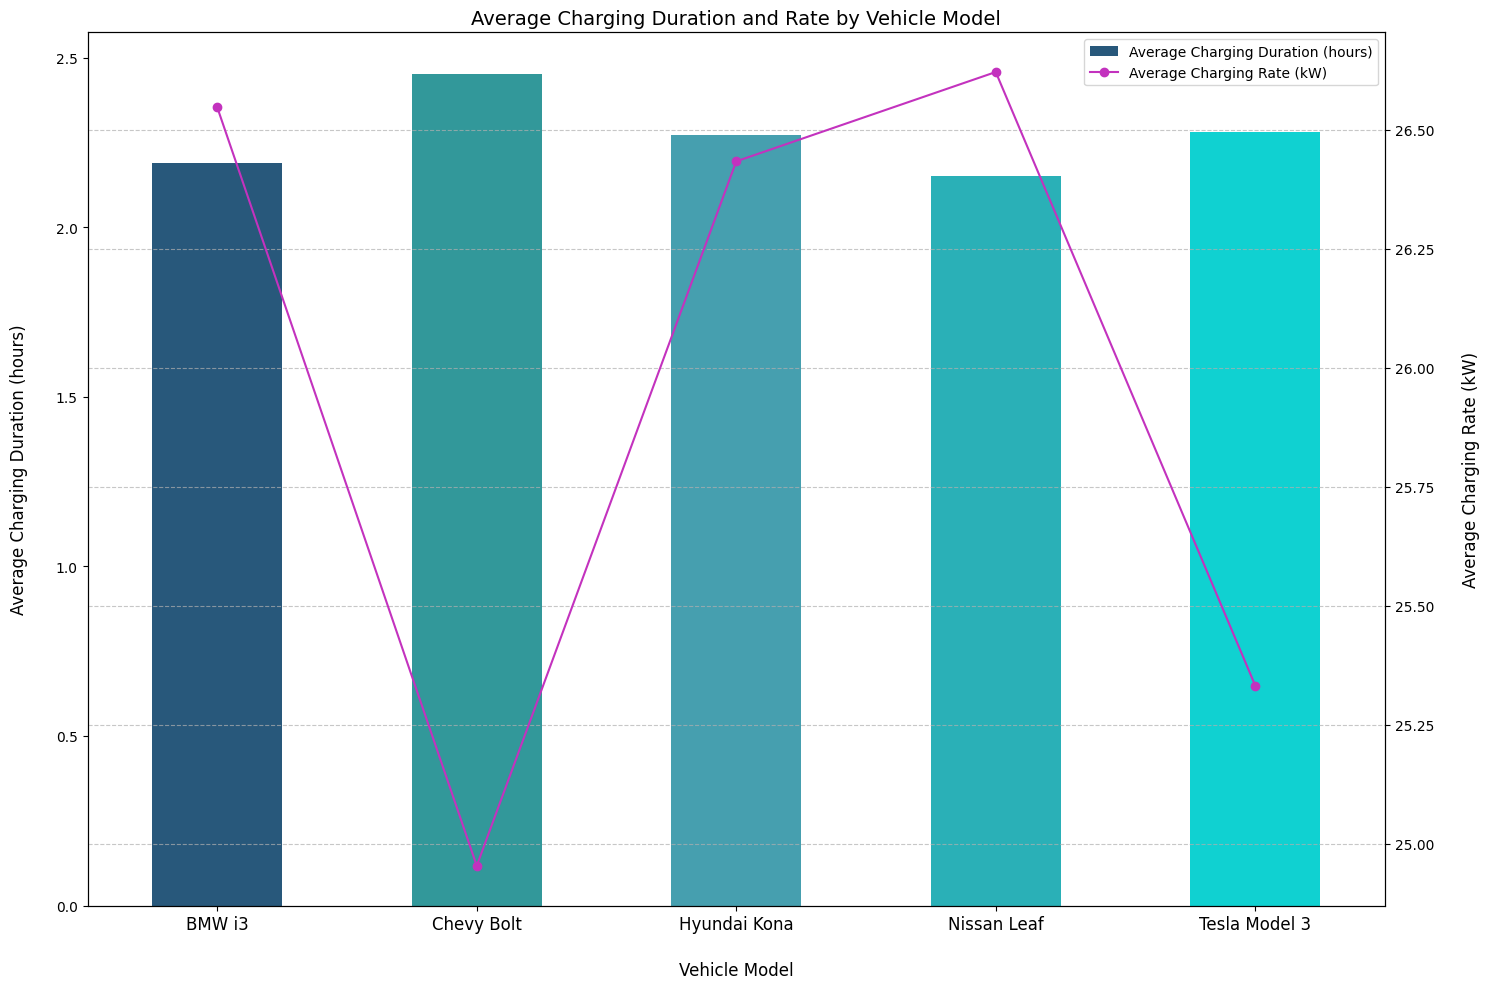

In [74]:
# Define bar colors
bar_colors = ['#28587B', '#32989A', '#469FAF', '#2AB0B7', '#10D1D1']
# Caclulate the average charging duration for each vehicle model
average_durations = data.groupby('Vehicle Model')['Charging Duration (hours)'].mean()
# Calculate the average charging rate for each vehicle model
charging_rates = data.groupby('Vehicle Model')['Charging Rate (kW)'].mean()

# Create a plot
fig, ax1 = plt.subplots(figsize=(15, 10))

# Plot the average charging duration
average_durations.plot(kind='bar', 
                       color=bar_colors[:len(average_durations)], 
                       ax=ax1, 
                       label='Average Charging Duration (hours)')

# Plot the second y-axis for the average charging rate
ax2 = ax1.twinx() # Create a second y-axis that shares the same x-axis
charging_rates.plot(kind='line',
                    color='#C332BE',
                    ax=ax2,
                    marker='o',  
                    label='Average Charging Rate (kW)')
# Set the title and labels
ax1.set_title('Average Charging Duration and Rate by Vehicle Model', fontsize=14)
ax1.set_ylabel('Average Charging Duration (hours)', fontsize=12, labelpad=20)
ax1.set_xlabel('Vehicle Model', fontsize=12, labelpad=20)

# Set the tick labels for the x-axis
ax1.set_xticks(range(len(average_durations)))
ax1.set_xticklabels(average_durations.index, rotation=0, fontsize=12)

# Set the labels for the y-axes
ax2.set_ylabel('Average Charging Rate (kW)', fontsize=12, labelpad=20)

# Add gridlines for the second y-axis
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, 
           labels_1 + labels_2, 
           loc='upper right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

The plot entitiled "Average Charging Duration adn Rate by Vehicle Model" aims to compare the average chargin duration and average charging rate for each vehicle model. This comparision is crucial for understanding the efficiency and performance of different electric vehicle (EV) models in terms of their charging characteristics.
### Detailed Analysis
1. **Average Charging Duration**:
    - The bar chart represents the average charging duration (in hours) for each vehicle model.
    - One of the observations that can be made from the chart is that the Chevy Bolt has the highest average charging duration, followed by the Hyundai Kona, Tesla Model 3, BMW i3, and Nissan Leaf.
    - This suggests that the Chevy Bolt generally takes longer to charge compared to other models.
2. **Average Charging Rate**:
    - The line chart with markers represents the average charging rate, measured in kilowatts, for each vehicle model.
    - The Nissan Leaf had the highest average charging rate, followed by the BMW i3, Hyundai Knoa, Tesla Model 3, and Chevy Bolt.
    - A higher charging rate indicates that the vehicle can charge more quickly.

Overall, Nissan Leaf might be the most efficient vehicle model as it has the lowest average charging duration with the highest average charging rate. On the other hand, the Chevy Bolt is the opposite with the highest average charging duration and the lowest average charging rate. This suggests a possible relationship about charging efficiency between charging duration and charging rate.